In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import os
import wrangle as w

## 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [2]:
#creating the connection to zillow
url = env.get_db_url('zillow')

In [3]:
#creating the query
zillow_query = '''
    SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
    FROM properties_2017
    WHERE propertylandusetypeid = 261
    LIMIT 100'''

In [4]:
#acquire zillow data
zillow_sample = pd.read_sql(zillow_query, url)
zillow_sample.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [5]:
def get_zillow_data():
    filename = "zillow.csv"

    if os.path.isfile(filename):

        return pd.read_csv(filename, index_col=0)
    else:
        # Create the url
        url = env.get_db_url('zillow')
        
        sql_query = '''
            SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
            FROM properties_2017
            WHERE propertylandusetypeid = 261'''

        # Read the SQL query into a dataframe
        df = pd.read_sql(sql_query, url)

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df

In [6]:
df = get_zillow_data()

In [7]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [8]:
df.shape

(2152863, 7)

In [9]:
df.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

## #2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [10]:
#datatypes, nulls and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [11]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


In [12]:
#stats summary of numeric values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [13]:
#what dataypes do we have?
df.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

In [14]:
df.shape

(2152863, 7)

In [15]:
#what does fips mean?
#how is that distributed?
df.fips.value_counts()

fips
6037.0    1431811
6059.0     555077
6111.0     165975
Name: count, dtype: int64

<hr style="border:1px solid grey">

### Clean the Columns

In [16]:
#look at the column names
df.columns.to_list()

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

In [17]:
#let's make this more readable
df = df.rename(columns={'bedroomcnt':'bedrooms',
                  'bathroomcnt':'bathrooms',
                  'calculatedfinishedsquarefeet':'area',
                  'taxvaluedollarcnt':'taxvalue',
                  'fips':'county'})

In [18]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


<hr style="border:1px solid grey">

In [19]:
#let's turn our column values into a list
col = df.columns.to_list()

In [20]:
#are we dealing with any nulls?
num_missing = df[col].isna().sum()
num_missing

bedrooms       11
bathrooms      11
area         8484
taxvalue      493
yearbuilt    9337
taxamount    4442
county          0
dtype: int64

In [21]:
#what percent of my entire dataset is this?
pct_missing = num_missing / df.shape[0]
pct_missing

bedrooms     0.000005
bathrooms    0.000005
area         0.003941
taxvalue     0.000229
yearbuilt    0.004337
taxamount    0.002063
county       0.000000
dtype: float64

In [22]:
#to drop nulls in specific columns
#df.dropna(subset=['bedrooms', 'bathrooms'])

In [23]:
#let's drop those null values
df = df.dropna()

In [24]:
#confirm our changes were made
df.isnull().sum()

bedrooms     0
bathrooms    0
area         0
taxvalue     0
yearbuilt    0
taxamount    0
county       0
dtype: int64

<hr style="border:1px solid grey">

In [25]:
df.dtypes

bedrooms     float64
bathrooms    float64
area         float64
taxvalue     float64
yearbuilt    float64
taxamount    float64
county       float64
dtype: object

In [26]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [27]:
#confirm whole numbers
for col in df.columns:
    print(col)
    print(df[col].value_counts().sort_index())
    print()

bedrooms
bedrooms
0.0       4397
1.0      22895
2.0     334221
3.0     962944
4.0     633608
5.0     150671
6.0      25117
7.0       4792
8.0       1103
9.0        290
10.0       118
11.0        34
12.0        12
13.0        15
14.0         7
15.0         5
16.0         2
18.0         3
25.0         1
Name: count, dtype: int64

bathrooms
bathrooms
0.00       4274
0.50         16
1.00     412582
1.50      31157
1.75          3
2.00     942463
2.50     142827
3.00     422398
3.50      28464
4.00      82039
4.50      19474
5.00      28306
5.50       6201
6.00      10717
6.50       1330
7.00       4381
7.50        382
8.00       1681
8.50        108
9.00        707
9.50         50
10.00       322
10.50        14
11.00       145
11.50         3
12.00        73
12.50         3
13.00        39
14.00        25
14.50         1
15.00        17
16.00        12
17.00         4
18.00         8
19.00         1
19.50         1
20.00         6
32.00         1
Name: count, dtype: int64

area
area
1.0  

In [28]:
#possibly an easier way to do this... create a lamda function
#let's see if there are any fractions in bathrooms
has_non_zero_decimal = df['bathrooms'].apply(lambda x: x % 1 != 0)
has_non_zero_decimal.any()

True

In [29]:
#how many?
has_non_zero_decimal.sum()

230034

In [30]:
#what about bedrooms?
has_non_zero_decimal = df['bedrooms'].apply(lambda x: x % 1 != 0)
has_non_zero_decimal.sum()

0

In [31]:
#put it all together for all the columns 
##so we can make sure those floats should be integers

#include these columns
columns_to_check = ['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount', 'county']

# create a dictionary to store the count of non-zero decimal places for each column
count_of_non_zero_decimal = {}

# iterate through columns and check for non-zero decimal places
for column in columns_to_check:
    has_non_zero_decimal = (df[column] % 1 != 0).sum()
    
    # store the count in the dictionary
    count_of_non_zero_decimal[column] = has_non_zero_decimal

# display the count of non-zero decimal places for each column
print("Count of Non-Zero Decimal Places in Each Column:")
for column, count in count_of_non_zero_decimal.items():
    print(f"{column}: {count}")


Count of Non-Zero Decimal Places in Each Column:
bedrooms: 0
bathrooms: 230034
area: 0
taxvalue: 0
yearbuilt: 0
taxamount: 2111620
county: 0


In [32]:
#columns we want to be integers
make_ints = ['bedrooms','area','taxvalue','yearbuilt','county']

In [33]:
#look through them to change the datatype
for col in make_ints:
    df[col] = df[col].astype(int)

In [34]:
df.dtypes

bedrooms       int64
bathrooms    float64
area           int64
taxvalue       int64
yearbuilt      int64
taxamount    float64
county         int64
dtype: object

In [35]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [36]:
#rename those columns
df.county = df.county.map({6037:'LA',6059:'Orange',6111:'Ventura'})

In [37]:
df.sample(10)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1658398,3,2.5,1953,1105607,1988,12454.60,Ventura
996259,2,1.0,654,174348,1923,2097.80,LA
1677412,4,1.5,1446,514660,1962,5922.56,Orange
1573484,4,3.0,2277,274057,1951,3069.59,LA
122430,3,2.0,1357,388363,1953,4540.15,LA
1693704,5,2.0,2288,81295,1898,1097.82,LA
946536,4,3.5,3642,687360,1990,6706.48,Orange
1940045,4,2.0,1958,179688,1989,2886.48,LA
40526,3,2.5,1632,516867,1957,6130.76,Orange
1351057,3,2.0,1640,514071,1950,6320.29,LA


### Visualize Our Data

In [38]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


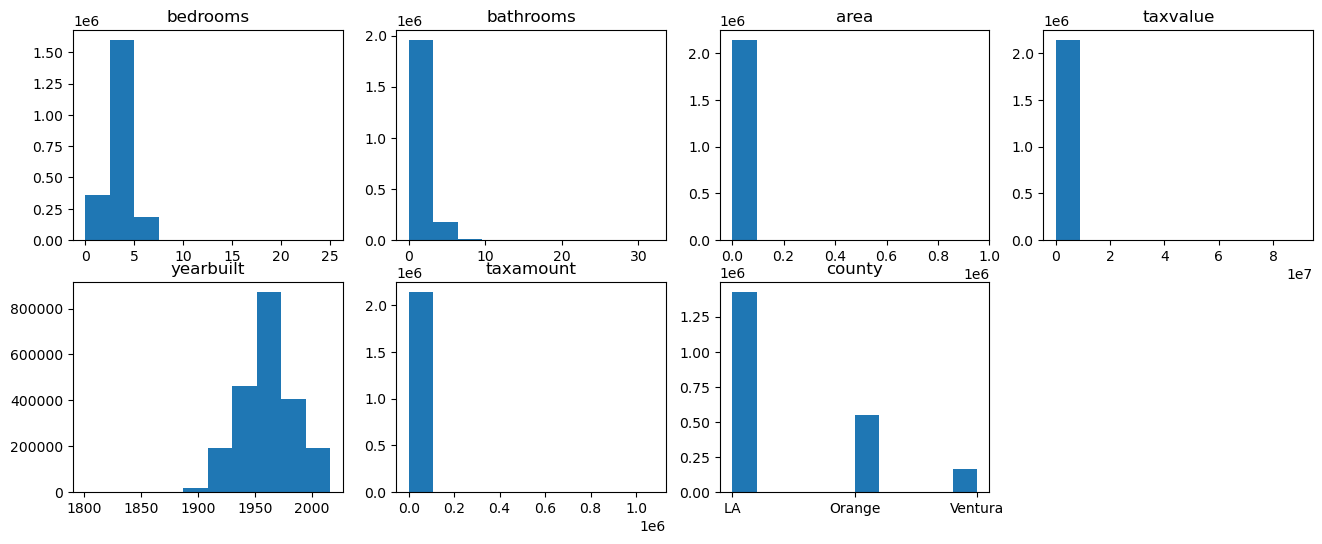

In [39]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(2, 4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    plt.hist(df[col])

plt.show()

bedrooms


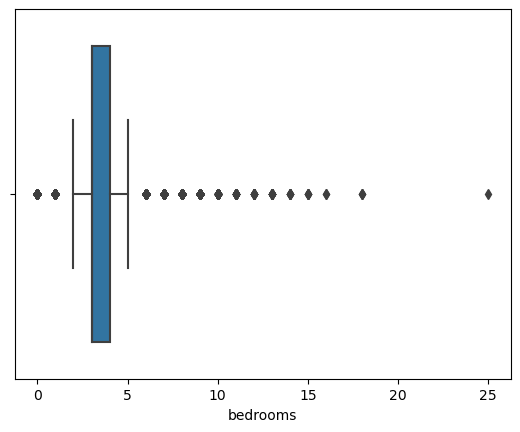

bedrooms
0       4397
1      22895
2     334221
3     962944
4     633608
5     150671
6      25117
7       4792
8       1103
9        290
10       118
11        34
12        12
13        15
14         7
15         5
16         2
18         3
25         1
Name: count, dtype: int64

bathrooms


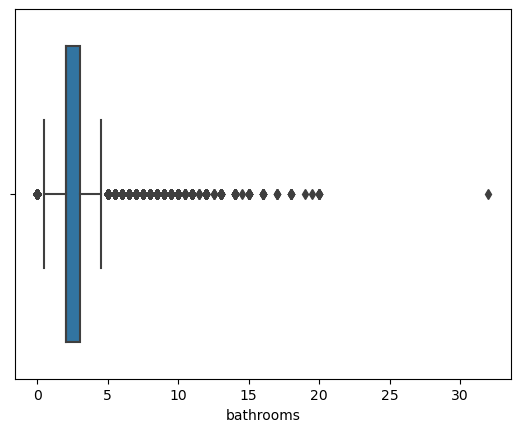

bathrooms
0.00       4274
0.50         16
1.00     412582
1.50      31157
1.75          3
2.00     942463
2.50     142827
3.00     422398
3.50      28464
4.00      82039
4.50      19474
5.00      28306
5.50       6201
6.00      10717
6.50       1330
7.00       4381
7.50        382
8.00       1681
8.50        108
9.00        707
9.50         50
10.00       322
10.50        14
11.00       145
11.50         3
12.00        73
12.50         3
13.00        39
14.00        25
14.50         1
15.00        17
16.00        12
17.00         4
18.00         8
19.00         1
19.50         1
20.00         6
32.00         1
Name: count, dtype: int64

area


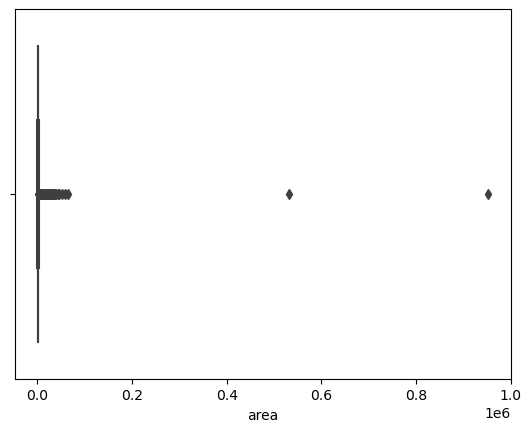

area
1         6
2         2
3         7
7         1
10        2
         ..
52503     1
59220     1
63692     1
531118    1
952576    1
Name: count, Length: 10557, dtype: int64

taxvalue


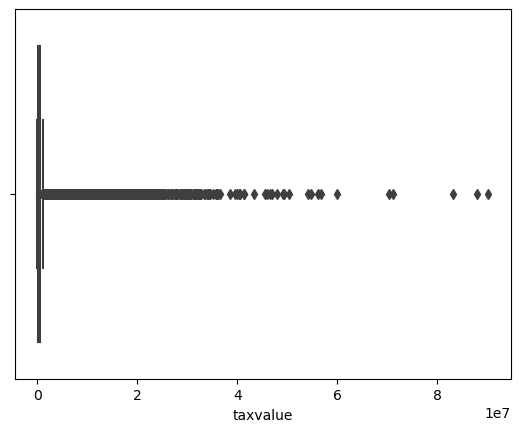

taxvalue
22          10
23           6
31           1
46           1
101          1
            ..
70416358     1
71067500     1
83196095     1
88020448     1
90188462     1
Name: count, Length: 588178, dtype: int64

yearbuilt


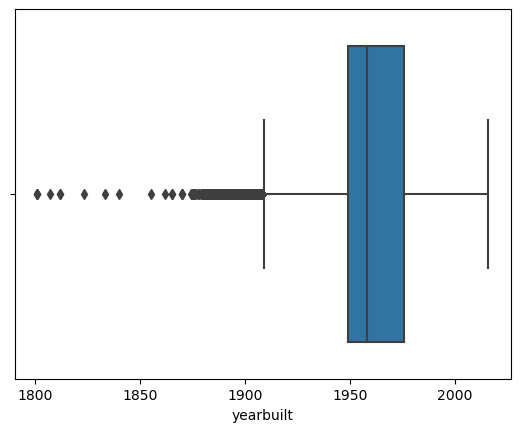

yearbuilt
1801       3
1807       1
1812       2
1823       1
1833       1
        ... 
2012    3431
2013    4768
2014    4706
2015    3551
2016      97
Name: count, Length: 153, dtype: int64

taxamount


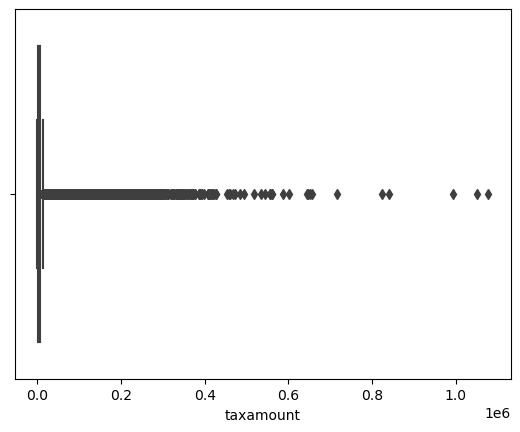

taxamount
6.34          1
13.36         4
13.44         1
13.47         4
13.48         1
             ..
824166.91     1
841059.04     1
994030.96     1
1052070.50    1
1078101.87    1
Name: count, Length: 915868, dtype: int64



In [40]:
for col in df.columns[:-1]:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show()
    
    print(df[col].value_counts().sort_index())
    print()

## #3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [41]:
def get_zillow_data():
    '''
    This function acquires zillow.csv it is available
    otherwise, it makes the SQL connection and uses the query provided
    to read in the dataframe from SQL.
    If they csv is not present, it will write one.
    '''
    filename = "zillow.csv"

    if os.path.isfile(filename):

        return pd.read_csv(filename, index_col=0)
    else:
        # Create the url
        url = env.get_db_url('zillow')
        
        sql_query = '''
            SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
            FROM properties_2017
            WHERE propertylandusetypeid = 261'''

        # Read the SQL query into a dataframe
        df = pd.read_sql(zillow_query, url)

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df

In [42]:
def prep_zillow(df):
    '''
    This function takes in a dataframe
    renames the columns and drops nulls values
    Additionally it changes datatypes for appropriate columns
    and renames fips to actual county names.
    Then returns a cleaned dataframe
    '''
    df = df.rename(columns = {'bedroomcnt':'bedrooms',
                     'bathroomcnt':'bathrooms',
                     'calculatedfinishedsquarefeet':'area',
                     'taxvaluedollarcnt':'taxvalue',
                     'fips':'county'})
    
    df = df.dropna()
    
    make_ints = ['bedrooms','area','taxvalue','yearbuilt']

    for col in make_ints:
        df[col] = df[col].astype(int)
        
    df.county = df.county.map({6037:'LA',6059:'Orange',6111:'Ventura'})
    
    return df

In [43]:
df = get_zillow_data()

In [44]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [45]:
df = w.wrangle_zillow()

In [46]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    2140235 non-null  int64  
 1   bathrooms   2140235 non-null  float64
 2   area        2140235 non-null  int64  
 3   tax_value   2140235 non-null  int64  
 4   year_built  2140235 non-null  int64  
 5   tax_amount  2140235 non-null  float64
 6   county      2140235 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 130.6+ MB


In [48]:
train, validate, test = w.splitting_data(df)

train ----> (1284141, 7) 60%
validate -> (428047, 7)  20%
test -----> (428047, 7)  20%


In [49]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,county
462820,5,4.0,3011,710674,2005,7561.14,Ventura
3880,3,2.0,1682,603333,1961,7086.19,LA
992263,4,2.0,1433,82804,1954,1134.83,LA
311722,3,2.5,2001,355444,1999,4174.92,Ventura
787985,4,2.0,2277,571000,1962,7113.02,LA
